In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='f'>

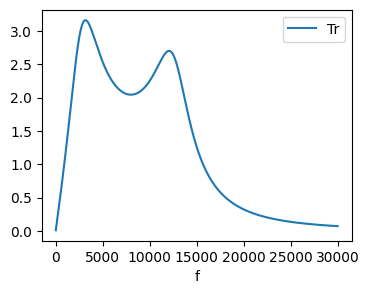

In [72]:
df = pd.read_csv('data/induc_paras_2.txt', 
                 sep='\t|,',  
                 engine='python',  
                 skiprows=1, 
                 names=['f', 'Tr', 'Ti'],
                 dtype='float'
)

df.plot(x='f',y='Tr', figsize=(4,3))

In [73]:
def get_Z1(w, R1,C1):
    zc = 1.0/(1j*w*C1)
    zr = R1

    return zc*zr/(zc+zr)

def get_ZL1(w, r1, L1):

    return r1+ 1j*w*L1


def get_ZL2(w, r2, L2):

    return r2+ 1j*w*L2

def get_Z2(w, R2,C2):
    
    zc = 1.0/(1j*w*C2)
    zr = R2
    return zc*zr/(zc+zr)


def get_Zsec(w, r2, L2, R2,C2):
    ZL2 = get_ZL2( w, r2, L2 )
    Z2 = get_Z2( w, R2, C2 )
    return ZL2+Z2 

def get_Zref( w, r2, L2, R2,C2, M ):

    Zsec= get_Zsec(w, r2, L2, R2,C2)
    return ((w*M)**2)/Zsec


def get_ZM( w, M ):

    return 1j*w*M


def Transf(f, R, R1,C1,r1,L1, R2,C2,r2,L2, k):

    w =2*np.pi*f

    M = k*np.sqrt(L1*L2)

    ZM  = get_ZM( w, M )
    Z1  = get_Z1(w, R1,C1)
    Z2  = get_Z1(w, R2,C2)
    ZL2 = get_ZL2(w, r2, L2)
    Zsec= get_Zsec(w, r2, L2, R2,C2)
    Zref= get_Zref( w, r2, L2, R2,C2, M )
    ZL1 = get_ZL1(w, r1, L1)

    zV2 = ZM*(-1+ ZL2/(Zsec))

    zVR = R*(ZL1+Zref+Z1)/(Z1)


    return abs(zV2/zVR)





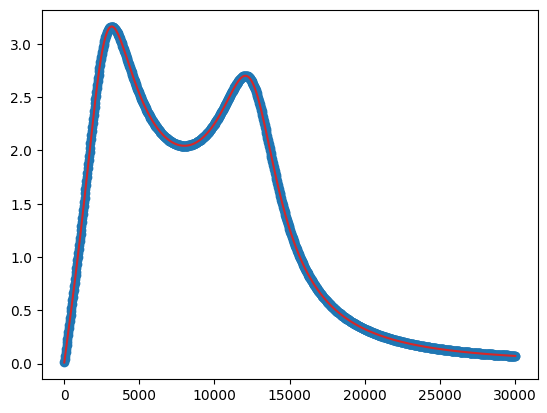

In [74]:
R= 100
R1 =1e3
C1 =50e-9
r1 =10 
L1 =10e-3
R2 =1e3 
C2 =50e-9
r2 =50
L2 =50e-3
k  =0.8

pars = [R, R1,C1,r1,L1, R2,C2,r2,L2, k]


fig, ax = plt.subplots()

ax.scatter( df["f"], df["Tr"] )


x = df["f"].to_numpy()
y = Transf( x, *pars )

ax.plot( x,y , c='C3')

plt.show()









